#### 1. 학업에 중요한 영향을 미치는 요인 파악 -> 학업 중퇴 및 실패 줄이기
#### 2. 개인별 학업 진행상황 파악 -> 성취도 높이기 위한 교육 및 활동 설계!
#### 3. 인구통계정보를 기반으로 특정 지역이나 사회계층적으로 고등교육에 접근하기 어려운 사람들을 위한 방법 설계!

##### 가설1) 부모님의 학력에 따른 중퇴여부, 상관관계
##### 가설2) 물가상승률과 실업률이 성적(1,2학기)에 영향을 줄까?

In [7]:
import pandas as pd

In [237]:
data = pd.read_csv("data/data_students.csv")
data

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Daytime/evening attendance
0,single,17,5,Animation and Multimedia Design,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime
1,single,15,1,Tourism,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,daytime
2,single,1,5,Communication Design,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime
3,single,17,2,Journalism and Communication,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,daytime
4,married,39,1,Social Service (evening attendance),Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and Communication,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Personal Services, Security and Safety Workers...",...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,daytime
4420,single,1,2,Journalism and Communication,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,daytime
4421,single,1,1,Nursing,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,daytime
4422,single,1,1,Management,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction and ...",...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,daytime


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Previous qualification                          4424 non-null   object 
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   object 
 7   Mother's qualification                          4424 non-null   object 
 8   Father's qualification                          4424 non-null   object 
 9   Mother's occupation                      

In [239]:
data['grade']=(data["Curricular units 1st sem (grade)"]+data["Curricular units 2nd sem (grade)"])/2

In [113]:
data["Curricular units 1st sem (grade)"]

0        0.000000
1       14.000000
2        0.000000
3       13.428571
4       12.333333
          ...    
4419    13.600000
4420    12.000000
4421    14.912500
4422    13.800000
4423    11.666667
Name: Curricular units 1st sem (grade), Length: 4424, dtype: float64

In [241]:
# 경고창 warnings 제거 코드
import warnings
warnings.filterwarnings('ignore')

In [243]:
data["Father's occupation"].unique()

array(['Unskilled Workers',
       'Intermediate Level Technicians and Professions',
       'Skilled Workers in Industry, Construction and Craftsmen',
       'Armed Forces Professions',
       'Personal Services, Security and Safety Workers and Sellers',
       'Installation and Machine Operators and Assembly Workers',
       'Administrative staff',
       ' Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
       'Specialists in Intellectual and Scientific Activities ',
       'Specialists in information and communication technologies (ICT)',
       'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
       'Student', 'Other Situation',
       'Workers in food processing, woodworking, clothing and other industries and crafts',
       'Specialists in the physical sciences, mathematics, engineering and related techniques',
       '(blank)', 'Other administrative support staff',
       'Street vendors (except fo

In [245]:
import numpy as np
data['Daytime/evening attendance']=np.where(data['Daytime/evening attendance']=="daytime",1,0)
data['Daytime/evening attendance']

0       1
1       1
2       1
3       1
4       0
       ..
4419    1
4420    1
4421    1
4422    1
4423    1
Name: Daytime/evening attendance, Length: 4424, dtype: int32

In [247]:
data.groupby('Daytime/evening attendance')['grade'].mean()

Daytime/evening attendance
0     9.617258
1    10.535797
Name: grade, dtype: float64

In [249]:
data['Target']=np.where(data['Target']=='Dropout',1,0)
data.groupby('Daytime/evening attendance')['Target'].mean()

Daytime/evening attendance
0    0.428571
1    0.308044
Name: Target, dtype: float64

In [251]:
data.groupby("Admission grade")['grade'].mean()

Admission grade
95.0      7.136050
95.1      0.000000
95.5      6.500000
95.8      0.000000
96.0      5.144099
           ...    
180.4    12.733333
183.5     6.000000
184.0    16.793889
184.4    14.666667
190.0    13.200820
Name: grade, Length: 620, dtype: float64

In [127]:
data.groupby("Course")['grade'].mean()

Course
Advertising and Marketing Management    11.007110
Agronomy                                 9.926741
Animation and Multimedia Design          2.076352
Basic Education                         11.018245
Biofuel Production Technologies          9.317172
Communication Design                    11.638760
Equinculture                             9.884412
Informatics Engineering                  8.676531
Journalism and Communication            11.365190
Management                               9.912321
Management (evening attendance)          9.163434
Nursing                                 12.409757
Oral Hygiene                            10.050185
Social Service                          11.176406
Social Service (evening attendance)     10.182955
Tourism                                 10.194371
Veterinary Nursing                      11.510099
Name: grade, dtype: float64

In [129]:
data.groupby('Target')['Course']

In [137]:
data["Mother's qualification"].unique()

array(['Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
       'Secondary Education - 12th Year of Schooling or Eq.',
       'Basic education 1st cycle (4th/5th year) or equiv.',
       'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
       'Higher Education - Degree', "Higher Education - Master's",
       'Professional higher technical course',
       "Higher Education - Bachelor's Degree", 'Unknown',
       'Other - 11th Year of Schooling',
       'Higher education - degree (1st cycle)',
       '12th Year of Schooling - Not Completed',
       'Higher Education - Doctorate',
       'Technological specialization course', '7th Year (Old)',
       'Specialized higher studies course', '8th year of schooling',
       '10th Year of Schooling', "Can't read or write",
       'Can read without having a 4th year of schooling',
       'Frequency of Higher Education',
       '11th Year of Schooling - Not Completed',
       '9th Year of Schooling - Not Completed',
       'High

In [183]:
data[["Target", 'grade','Scholarship holder']].corr()

,Target,grade,Scholarship holder
Target,1.000000,-0.550759,-0.245354
grade,-0.550759,1.000000,0.182591
Scholarship holder,-0.245354,0.182591,1.000000


In [253]:
data['International']=np.where(data['International']=='yes',1,0)
data['International']

0       1
1       1
2       1
3       1
4       1
       ..
4419    1
4420    0
4421    1
4422    1
4423    0
Name: International, Length: 4424, dtype: int32

In [255]:
data['Debtor']=np.where(data['Debtor']=='yes',1,0)
data['Debtor']

0       0
1       0
2       0
3       0
4       0
       ..
4419    0
4420    1
4421    0
4422    0
4423    0
Name: Debtor, Length: 4424, dtype: int32

In [257]:
data['Scholarship holder']=np.where(data['Scholarship holder']=='yes',1,0)
data['Scholarship holder']

0       0
1       0
2       0
3       0
4       0
       ..
4419    0
4420    0
4421    1
4422    1
4423    0
Name: Scholarship holder, Length: 4424, dtype: int32

In [265]:
data.groupby("Admission grade")['Target'].mean()

Admission grade
95.0     0.636364
95.1     1.000000
95.5     0.500000
95.8     1.000000
96.0     0.714286
           ...   
180.4    1.000000
183.5    1.000000
184.0    0.000000
184.4    0.000000
190.0    0.333333
Name: Target, Length: 620, dtype: float64

In [261]:
data.groupby("Previous qualification")['Target'].mean()

Previous qualification
10th year of schooling                                      1.000000
10th year of schooling - not completed                      0.500000
11th year of schooling - not completed                      0.750000
12th year of schooling - not completed                      1.000000
Basic education 2nd cycle (6th/7th/8th year) or equiv.      0.428571
Basic education 3rd cycle (9th/10th/11th year) or equiv.    0.641975
Frequency of higher education                               0.437500
Higher education - bachelor's degree                        0.695652
Higher education - degree                                   0.595238
Higher education - degree (1st cycle)                       0.350000
Higher education - doctorate                                1.000000
Higher education - master (2nd cycle)                       0.333333
Higher education - master's                                 0.500000
Other - 11th year of schooling                              0.577778
Professiona

In [277]:
data.groupby("Tuition fees up to date")['Target'].mean()

Tuition fees up to date
no     0.865530
yes    0.247433
Name: Target, dtype: float64

In [299]:
data[data["Tuition fees up to date"]=='no']['Nacionality'].value_counts()

Nacionality
Portuguese      505
Brazilian         9
Santomean         4
Cape Verdean      4
Spanish           2
Guinean           2
Lithuanian        1
Russian           1
Name: count, dtype: int64

In [263]:
data['Previous qualification'].value_counts()

Previous qualification
Secondary education                                         3717
Technological specialization course                          219
Basic education 3rd cycle (9th/10th/11th year) or equiv.     162
Higher education - degree                                    126
Other - 11th year of schooling                                45
Higher education - degree (1st cycle)                         40
Professional higher technical course                          36
Higher education - bachelor's degree                          23
Frequency of higher education                                 16
12th year of schooling - not completed                        11
Higher education - master's                                    8
Basic education 2nd cycle (6th/7th/8th year) or equiv.         7
Higher education - master (2nd cycle)                          6
11th year of schooling - not completed                         4
10th year of schooling - not completed                         2
Hi

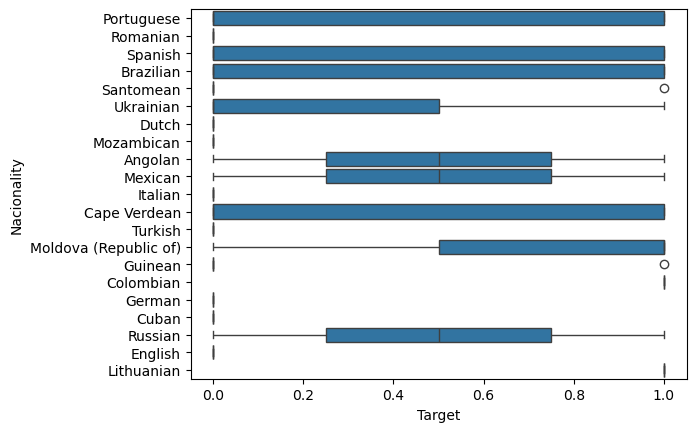

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Target', y='Nacionality', data=data)
plt.show()

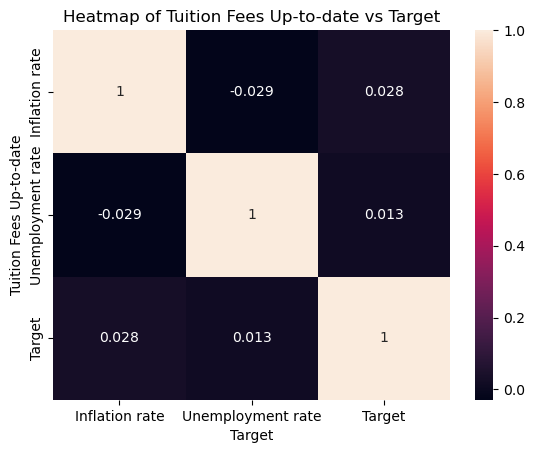

In [323]:
# 학비 납부 상태와 타겟 간의 히트맵
heatmap_data = data[['Inflation rate', 'Unemployment rate', 'Target']].corr()

sns.heatmap(heatmap_data, annot=True)
plt.title('Heatmap of Tuition Fees Up-to-date vs Target')
plt.ylabel('Tuition Fees Up-to-date')
plt.xlabel('Target')
plt.show()

In [311]:
# 성적과 타겟 간의 히트맵
sns.heatmap('grade','Target', data, cmap='coolwarm')
plt.title('Grade vs Target')
plt.ylabel('grade')
plt.xlabel('Target')
plt.show()

TypeError: heatmap() takes 1 positional argument but 3 positional arguments (and 1 keyword-only argument) were given